In [1]:
import numpy as np
import pandas as pd

In [2]:
# Load the dataset

In [3]:
data=pd.read_csv("Churn_Modelling.csv")

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.shape

(10000, 14)

In [6]:
data.size

140000

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [9]:
# Visualizations

In [10]:
# univariate analysis


In [11]:
X = data.iloc[:,3:13]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [12]:
y = data.iloc[:,13]
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='Exited', ylabel='count'>

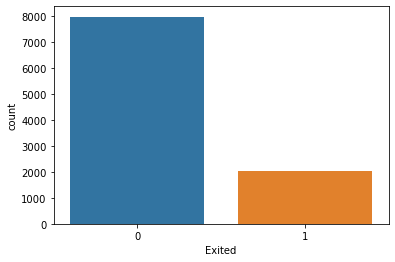

In [14]:
sns.countplot(x=y)

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

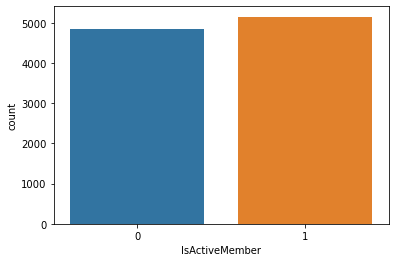

In [15]:
sns.countplot(x=data['IsActiveMember'])

In [16]:
# Bivariate analysis

<AxesSubplot:xlabel='Gender', ylabel='Exited'>

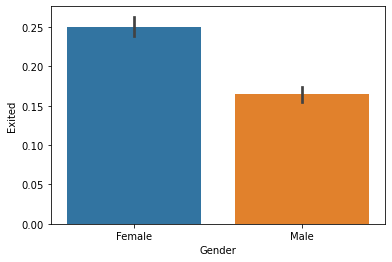

In [17]:
sns.barplot(x='Gender',y='Exited',data=data)

<AxesSubplot:xlabel='Exited', ylabel='CreditScore'>

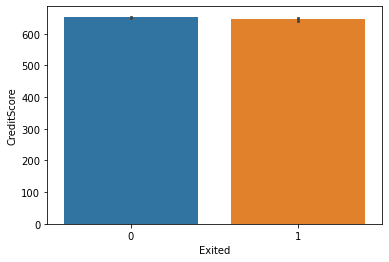

In [19]:
sns.barplot(x='Exited',y='CreditScore',data=data)

<AxesSubplot:xlabel='Geography', ylabel='count'>

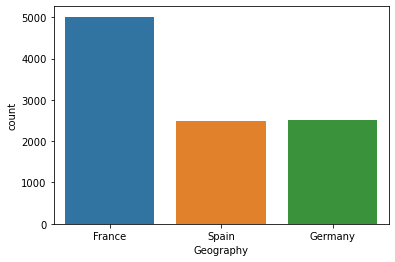

In [23]:
sns.countplot(x=X['Geography'])

<AxesSubplot:xlabel='Geography', ylabel='Exited'>

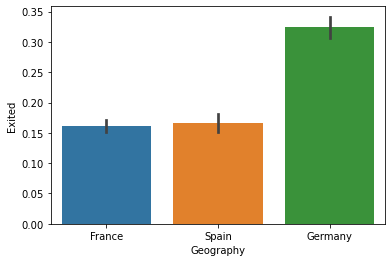

In [24]:
sns.barplot(x='Geography', y='Exited', data=data)

Male      5457
Female    4543
Name: Gender, dtype: int64


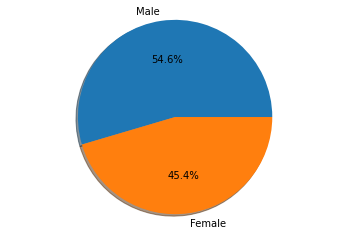

In [25]:
labels = ['Male','Female']
sizes = X['Gender'].value_counts()
print(sizes)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

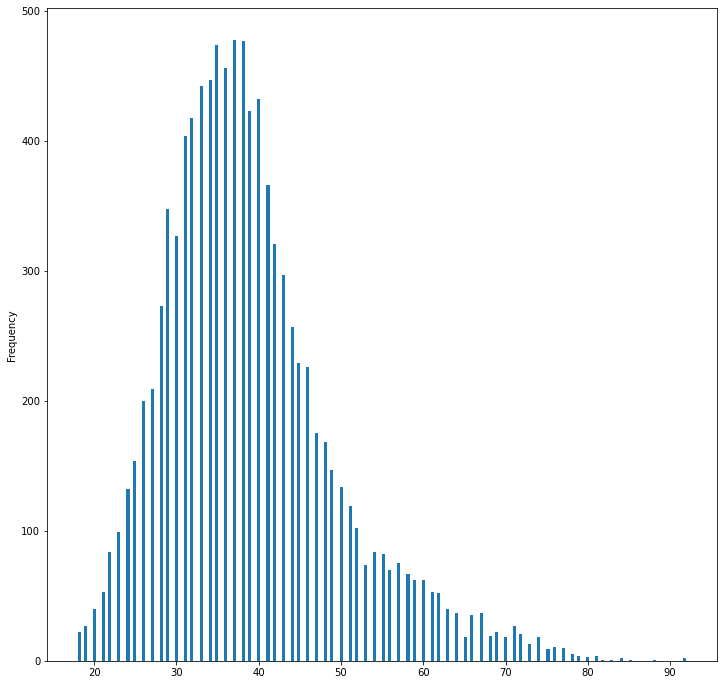

In [27]:
data.Age.plot(kind = 'hist', bins = 200, figsize = (12,12))
plt.show()

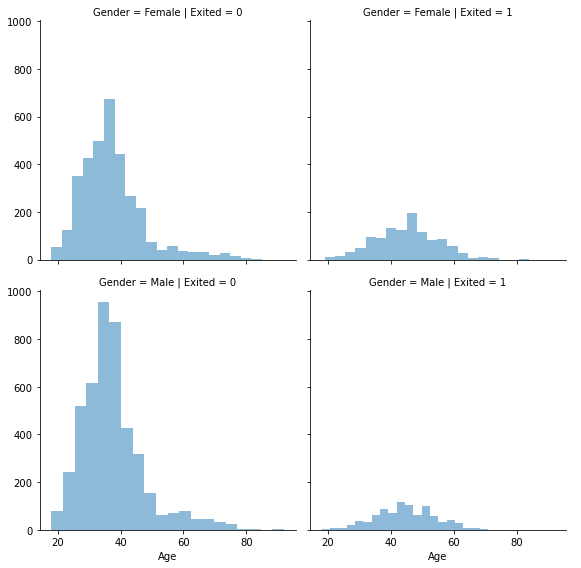

In [29]:
g = sns.FacetGrid(data, row='Gender', col='Exited', height=4)
g.map(plt.hist,'Age', alpha=0.5, bins=20)
g.add_legend()
plt.show()

In [ ]:
## Multivariate analysis

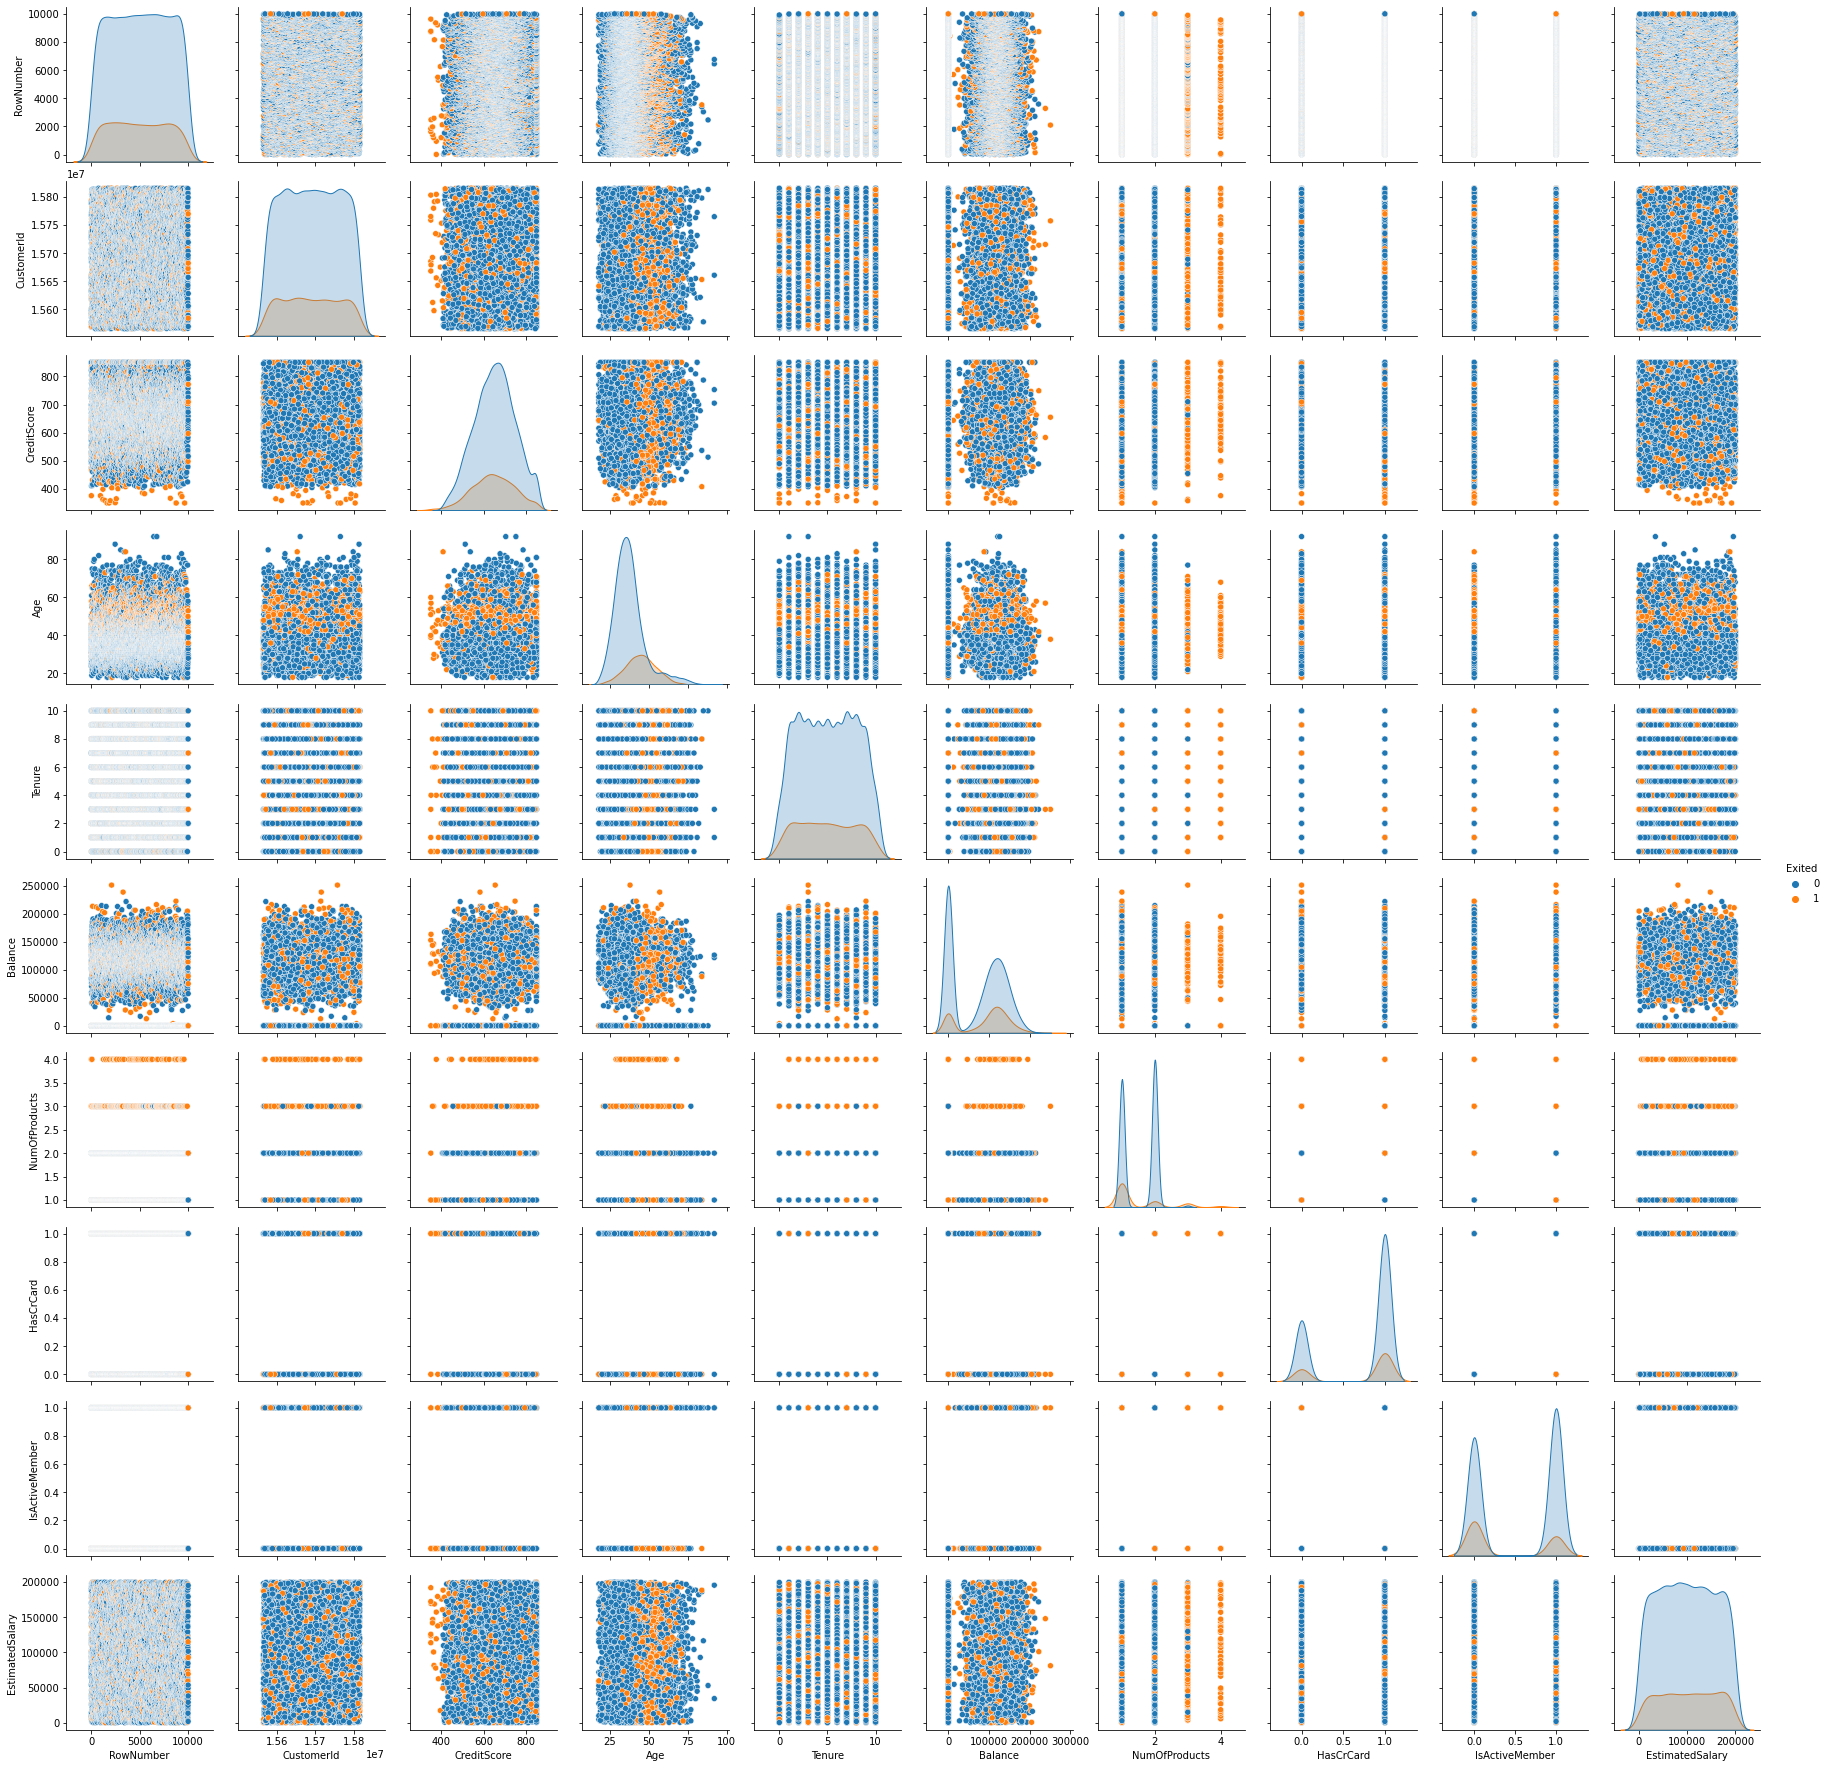

In [22]:
sns.pairplot(data,hue='Exited')

In [ ]:
## Perform descriptive statistics on the dataset.

In [31]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
## Handle missing values

In [35]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
## No missing Values

In [ ]:
## Find the outliers and replace the outliers

In [39]:
# There are different ways and methods of identifying outliers, but we are only going to use some of the most popular techniques:

# Visualization
# Skewness
# Interquartile Range
# Standard Deviation

<AxesSubplot:xlabel='Age'>

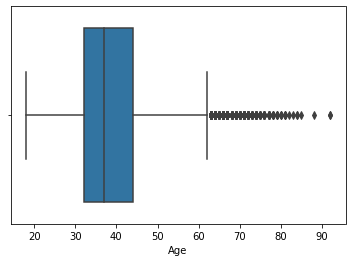

In [42]:
# Boxplot
sns.boxplot(x=data['Age'],data=data)

<AxesSubplot:>

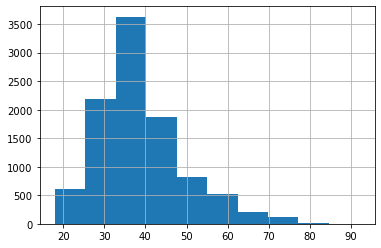

In [44]:
# Histogram

data['Age'].hist()

In [ ]:
# Skewness
# the skewness value should be within the range of -1 to 1 for a normal distribution, any major changes from this value may indicate the presence of outliers.

In [45]:
print('skewness value of Age: ',data['Age'].skew())

skewness value of Age:  1.0113202630234552


In [47]:
# Outliers Treatment
# Flooring and Capping.
# Trimming.
# Replacing outliers with the mean, median, mode, or other values.


# Flooring And Capping
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
data['Age']=np.where(data['Age']>upper_whisker,upper_whisker,np.where(data['Age']<lower_whisker,lower_whisker,data['Age']))


<AxesSubplot:xlabel='Age'>

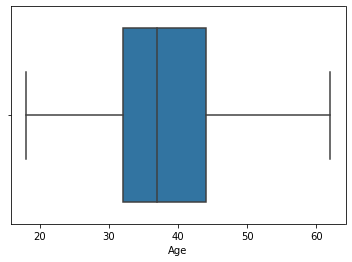

In [50]:
sns.boxplot(x=data['Age'],data=data)

In [ ]:
# Check for Categorical columns and perform encoding.


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [53]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

data['Geography']=le.fit_transform(data['Geography'])

In [54]:
data['Gender']=le.fit_transform(data['Gender'])

In [56]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43.0,2,125510.82,1,1,1,79084.10,0


In [58]:
# Split the data into dependent and independent variables.

X = data.iloc[:,3:13]

y = data.iloc[:,13]

In [59]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42.0,2,0.00,1,1,1,101348.88
1,608,2,0,41.0,1,83807.86,1,0,1,112542.58
2,502,0,0,42.0,8,159660.80,3,1,0,113931.57
3,699,0,0,39.0,1,0.00,2,0,0,93826.63
4,850,2,0,43.0,2,125510.82,1,1,1,79084.10


In [60]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [61]:
# Scale the independent variables

from sklearn import preprocessing
  
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
  
# Scaled feature
x_after_min_max_scaler = min_max_scaler.fit_transform(X)
  
print ("\nAfter min max Scaling : \n", x_after_min_max_scaler)


After min max Scaling : 
 [[0.538      0.         0.         ... 1.         1.         0.50673489]
 [0.516      1.         0.         ... 0.         1.         0.56270874]
 [0.304      0.         0.         ... 1.         0.         0.56965435]
 ...
 [0.718      0.         0.         ... 0.         1.         0.21039009]
 [0.844      0.5        1.         ... 1.         0.         0.46442905]
 [0.884      0.         0.         ... 1.         0.         0.19091423]]


In [62]:
#Standardisation

Standardisation = preprocessing.StandardScaler()
  
# Scaled feature
x_after_Standardisation = Standardisation.fit_transform(X)
  
print ("\nAfter Standardisation : \n", x_after_Standardisation)


After Standardisation : 
 [[-0.32622142 -0.90188624 -1.09598752 ...  0.64609167  0.97024255
   0.02188649]
 [-0.44003595  1.51506738 -1.09598752 ... -1.54776799  0.97024255
   0.21653375]
 [-1.53679418 -0.90188624 -1.09598752 ...  0.64609167 -1.03067011
   0.2406869 ]
 ...
 [ 0.60498839 -0.90188624 -1.09598752 ... -1.54776799  0.97024255
  -1.00864308]
 [ 1.25683526  0.30659057  0.91241915 ...  0.64609167 -1.03067011
  -0.12523071]
 [ 1.46377078 -0.90188624 -1.09598752 ...  0.64609167 -1.03067011
  -1.07636976]]


In [65]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=89)

In [66]:
X_train.shape

(8000, 10)

In [67]:
X_test.shape

(2000, 10)

In [68]:
# Decision Tree

from sklearn.metrics import accuracy_score, classification_report

from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()

dt.fit(X_train,y_train)
prediction_dt = dt.predict(X_test)

accuracy_dt = accuracy_score(y_test,prediction_dt)*100

In [70]:
print('Accuracy score : ',accuracy_dt)

Accuracy score :  79.0
